# Deep Learning Course

## Assignment 1

#### Assignment Goals:

* Start with PyTorch.
* Implement and apply logistic regression and multi-layer feed-forward neural network classifiers.
* Understand the differences and trade-offs between linear regression, logistic regression, and multi-layer feed-forward neural network.

In this assignment, you will be asked to install [PyTorch](https://pytorch.org/) and [Jupyter Notebook](https://jupyter.org/install). (TA's environment to run your code is Python 3.11 + Torch 2.1.2). In addition, you are required to design several models to classify a Toy Dataset (Figure 1).

#### Dataset: 

We provide a toy dataset, which has 200 instances and 2 features. See below "Toy Data and Helper Functions" section for toy data generation code. 

You do not need to generate separated training dataset and test dataset for this assignment. Both training and prediction will both be on one dataset. Directly use the "sample, target" variables we provide as the dataset for your assignment. 

In the following accuracy is defined as the empirical accuracy on the training set, that is, accuracy = {number of correctly predicted instances}/{number of all instances in dataset}).

#### Requirements

1. Install Pytorch() and Jupyter Notebook. (10 points)
    
2. Implement a [logistic regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) to classify the Toy Dataset. (20 points) We have provided a very simple linear regression example, please refer to the example and implement your logistic regression model. 
    * You should determine: what loss function and what optimization algorithm do you plan to use? (4 points)
    * Try to reach > 72% accuracy. (4 points)
    * We have provided a visualize() helper function, you can visualize the model's decision boundary using that function. What's more, you are asked to compute and visualize **the equation of the decision boundary** of your trained **logistic regression**. Fill in the 'equation of decision boundary' column in the following table. Then you can modify the visualize() function or implement a new visualization function to draw the linear decision boundary (Hint: should be a straight line aligned with the decision boundary plotted in visualize()). (5 points)
    

3. Implement a multi-layer linear neural network (>= 2 hidden layers) to classify the Toy Dataset. (20 points) A deep linear neural network is a deep feed-forward neural network without activation functions (See [here](https://www.cs.princeton.edu/courses/archive/fall19/cos597B/lecnotes/linearnetsbyNC.pdf), page 11-13 for detail introduction of linear neural networks). 
    * You should determine: what loss function and what optimization algorithm do you plan to use, what is your network structure? (4 points)
    * Try to reach > 72% accuracy. (4 points)
    * Compute and visualize **the equation of the decision boundary** of your trained **linear neural network**. Fill in the 'equation of decision boundary' column in the following table. Then you can modify the visualize() function or implement a new visualization function to draw the linear decision boundary. (5 points)
    

4. Implement a multi-layer feed-forward neural network (>= 2 hidden layers). (20 points)
    * You should determine: what loss function and what optimization algorithm do you plan to use? what is your network structure? what activation function do you use? (5 points)
    * Try to reach 100% accuracy. (5 points)


5. Add L2-regularization to your implemented nonlinear neural network in (4.). Set the coefficient of L2-regularization to be 0.01, 2, 100, respectively. How do different values of coefficient of L2-regularization affect the model (i.e., model parameters, loss value, accuracy, decision boundary)? You can use a table to compare models trained without regularization, with different coefficients of regularization. (20 points) 
    * Please draw your table and analysis in the '**Answers and Analysis**' section.


You should:

* Train each of your models to its best accuracy. Then fill in the following table in the '**Answers and Analysis**' section.

* Complete the '**Answers and Analysis**' section. 

#### Answers and Analysis

* First, fill in the following table. The '-' indicates a cell that does not need to be filled in.

|  Model | Loss  | Accuracy | Equation of Decision Boundary | NN Structure | Activation Function |Optimization Algorithm| Loss Function |
|---|:---:|:---:|:---: | :---: | :---: | :---: |:---: |
| Linear Regression  |  0.15 |  74% | $0.1817x_1+0.5237x_2 + 0.4758=0$  | -  | -  |SGD| Mean Square Error  |
| Logistic Regression  |  0.5939655303955078 |  75.5% | $x_2 = -(0.26430854201316833*x_1 + tensor([-0.1892])) / 0.8816277384757996$  | -  |  - |Adam| Binary Cross Entropy  | 
| Linear Neural Network  | 0.0076  |  74.8% |  $x_2 = -(3.1050491333007812 * x_1 + tensor([ 1.1808, -0.3879])) / 9.809708595275879$ |  layer input sizes: 2, 32, 8, 4 |  Sigmoid(only the last layer) |SGD|  Binary Cross Entropy | 
| Feedforward Neural Network |  0.0036 |  99.5% | -  |  layer input sizes:2, 8, 23, 30, 62, 16, 8, 4 | Relu for all the hidden layers, sigmoid for the last layer  |SGD| Binary Cross Entropy  |


* Then, compare and analyze the classification results of your models. In particular, are there any differences between the performance (i.e., accuracy, loss value) of linear regression, logistic regression, linear neural network and deep nonlinear neural network? What do you think is the reason for the difference? (10 points)

* Your table and analysis of (5. Add L2-regularization) here.

|  L2 coefficient | Loss  | Accuracy | Decision Boundary | 
|---|:---:|:---:|:---: | 
| None  |  0.0036 |  99.5% | Ok  | 
| 0.01  |  0.027 |  99.1% | Ok  | 
| 2  |  0.693 |  50% | seems random  | 
| 100  |  0.693 |  50% | seems random  | 
### All the models start at the exact same place. Seems like lambda = 0.01 does a fantastic job! It goes down but comes back up to 91 percent. Others fall down and get stuck at the 50% accuracy. 

#### Submission Notes:

Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in both .pdf and .ipynb format. 



#### Instructions:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your own writing or coding. You must not let other students copy your work. Spelling and grammar count.


Your assignments will be marked based on correctness, originality (the implementations and ideas are from yourself), clarity and performance.
Clarity means whether the logic of your code is easy to follow. This includes 1) comments to explain the logic of your code 2) meaningful variable names. Performance includes loss value and accuracy after training.


  

## Your Implementation

### Toy Data and Helper Functions

In [117]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [118]:
# helper functions

# helper function for geterating the data
def data_generator(N = 200,D = 2,K = 2):
    """
    N: number of points per class; 
    D: dimensionality; 
    K: number of classes
    """

    np.random.seed(10)
    X = np.zeros((N*K,D))
    y = np.zeros((N*K), dtype='uint8')
    
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.3 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
   
    plt.xlim(X.min()-.5, X.max()+.5)
    plt.ylim(X.min()-.5, X.max()+.5)
    
    return X,y


# helper function for visualizing the decision boundaries
def visualize(sample, target, model):
    """
    Function for visualizing the classifier boundaries on the TOY dataset.

    sample: Training data features (PyTorch tensor)
    target: Target (PyTorch tensor)
    model: The PyTorch model
    """
    h = 0.02  # Step size in the meshgrid
    x_min, x_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
    y_min, y_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1

    # Create a meshgrid for visualization
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, h), torch.arange(y_min, y_max, h))

    # Flatten and concatenate the meshgrid for prediction
    grid_tensor = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    
    # Predict the class labels for each point in the meshgrid
    with torch.no_grad():
        model.eval()  # Set the model to evaluation mode
        predictions = model(grid_tensor)

    #Binary Classification
    Z = torch.where(predictions>0.5,1.0,0.0)
    Z = Z.reshape(xx.shape)

    # Create a contour plot to visualize the decision boundaries
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # Scatter plot the training data points
    plt.scatter(sample[:, 0], sample[:, 1], c=target, s=40, cmap=plt.cm.Spectral)

    # Set plot limits
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()
    

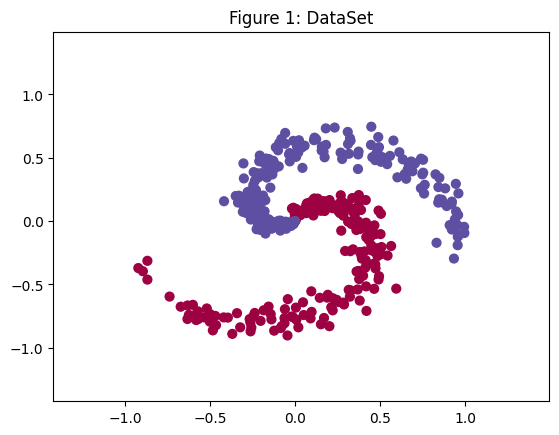

In [119]:
#  TOY DataSet
sample, target = data_generator(N = 200)
# print(target.shape)

### Given Example: Linear Regression


Note that linear regression is usually used for regression tasks, not classification tasks. However, it can be used for binary classification problems (be labeled 0, 1) with a threshold classifier. That is, when linear regression outputs > 0.5, the prediction is 1; otherwise, the prediction is 0. 

In [29]:
# Convert data to PyTorch tensors
X_tensor = torch.from_numpy(sample).float()
y_tensor = torch.from_numpy(target).float()

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size,1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
# input_size = 1  # Number of features in the input data
model = LinearRegressionModel(X_tensor.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_tensor)
    y_pred = y_pred.reshape(y_tensor.shape)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)

    #Calculate Accuracy
    
    output = torch.where(y_pred>0.5, 1.0,0.0)   
    acc = accuracy_score(y_tensor, output)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}')



Epoch [1/500], Loss: 0.4022, Accuracy: 0.5
Epoch [2/500], Loss: 0.3936, Accuracy: 0.5
Epoch [3/500], Loss: 0.3854, Accuracy: 0.5
Epoch [4/500], Loss: 0.3775, Accuracy: 0.5
Epoch [5/500], Loss: 0.3698, Accuracy: 0.5
Epoch [6/500], Loss: 0.3625, Accuracy: 0.5
Epoch [7/500], Loss: 0.3555, Accuracy: 0.5
Epoch [8/500], Loss: 0.3487, Accuracy: 0.5
Epoch [9/500], Loss: 0.3422, Accuracy: 0.5
Epoch [10/500], Loss: 0.3360, Accuracy: 0.5
Epoch [11/500], Loss: 0.3300, Accuracy: 0.5
Epoch [12/500], Loss: 0.3242, Accuracy: 0.5
Epoch [13/500], Loss: 0.3187, Accuracy: 0.5
Epoch [14/500], Loss: 0.3133, Accuracy: 0.5
Epoch [15/500], Loss: 0.3082, Accuracy: 0.5
Epoch [16/500], Loss: 0.3033, Accuracy: 0.5
Epoch [17/500], Loss: 0.2986, Accuracy: 0.5025
Epoch [18/500], Loss: 0.2940, Accuracy: 0.505
Epoch [19/500], Loss: 0.2896, Accuracy: 0.51
Epoch [20/500], Loss: 0.2854, Accuracy: 0.5125
Epoch [21/500], Loss: 0.2814, Accuracy: 0.52
Epoch [22/500], Loss: 0.2775, Accuracy: 0.5275
Epoch [23/500], Loss: 0.2737

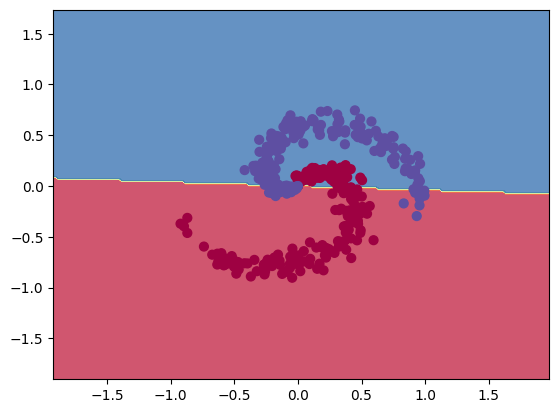

In [30]:
visualize(sample,target, model)

**Here is an example: the green line is the line of the decision boundary. You should draw the linear decision boundary like this.**

#### Given Example: Weights and Bias

You can use weight and bias attributes of your model to find the equation of the decision boundary.

In [31]:
print("Weights: \n",model.linear.weight)
print("Bias: \n",model.linear.bias)

Weights: 
 Parameter containing:
tensor([[0.0271, 0.6808]], requires_grad=True)
Bias: 
 Parameter containing:
tensor([0.4992], requires_grad=True)


### Logistic Regression

In [41]:
import seaborn as sns
import numpy as np
import matplotlib
from tqdm import tqdm
import torch
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
X_tensor = torch.from_numpy(sample).float()
y_tensor = torch.from_numpy(target).float()

class LogisticRegression_class(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression_class, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

epochs = 45
# input_dim = 2 # Two inputs x1 and x2 
# output_dim = 1 # Two possible outputs
# learning_rate = 0.001

LogisticRegression_model = LogisticRegression_class(X_tensor.shape[1])
criterion = nn.BCELoss()

losses = []
losses_test = []
Iterations = []
iter = 0
learning_rate = 0.01
for epoch in range(epochs):
    y_pred = LogisticRegression_model(X_tensor)
    y_pred = y_pred.reshape(y_tensor.shape)
    

    loss = criterion(y_pred, y_tensor)

    
    output = torch.where(y_pred>0.5, 1.0,0.0)  

    acc = accuracy_score(y_tensor, output)
    optimizer = optim.Adam(LogisticRegression_model.parameters(), lr=learning_rate)
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}')



Epoch [1/500], Loss: 0.6946, Accuracy: 0.5
Epoch [2/500], Loss: 0.6914, Accuracy: 0.5
Epoch [3/500], Loss: 0.6883, Accuracy: 0.5
Epoch [4/500], Loss: 0.6853, Accuracy: 0.5
Epoch [5/500], Loss: 0.6823, Accuracy: 0.5
Epoch [6/500], Loss: 0.6793, Accuracy: 0.5
Epoch [7/500], Loss: 0.6764, Accuracy: 0.5
Epoch [8/500], Loss: 0.6734, Accuracy: 0.5
Epoch [9/500], Loss: 0.6706, Accuracy: 0.5
Epoch [10/500], Loss: 0.6678, Accuracy: 0.5
Epoch [11/500], Loss: 0.6650, Accuracy: 0.5
Epoch [12/500], Loss: 0.6622, Accuracy: 0.5
Epoch [13/500], Loss: 0.6595, Accuracy: 0.5
Epoch [14/500], Loss: 0.6568, Accuracy: 0.5
Epoch [15/500], Loss: 0.6542, Accuracy: 0.5
Epoch [16/500], Loss: 0.6516, Accuracy: 0.5
Epoch [17/500], Loss: 0.6491, Accuracy: 0.5
Epoch [18/500], Loss: 0.6466, Accuracy: 0.5
Epoch [19/500], Loss: 0.6441, Accuracy: 0.5
Epoch [20/500], Loss: 0.6416, Accuracy: 0.5075
Epoch [21/500], Loss: 0.6393, Accuracy: 0.51
Epoch [22/500], Loss: 0.6369, Accuracy: 0.515
Epoch [23/500], Loss: 0.6346, Accur

### The accuracy of the model changes every time I run it because of the random weight initialization. To confirm that I have reached the accuracy, I have saved my models and included their files in my submission. I load them from here and get their accuracy on the data once again

In [42]:

#torch.save(LogisticRegression_model, 'logistic_regression75.pth')


In [46]:


LogisticRegression_loaded = torch.load('logistic_regression75.pth')

In [47]:

LogisticRegression_loaded.eval()

LogisticRegression_class(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [52]:
y_pred = LogisticRegression_loaded(X_tensor)
output = torch.where(y_pred>0.5, 1.0,0.0)  
acc = accuracy_score(y_tensor, output)
final_loss = loss.item()
print("accuracy: "+str(acc)+"  loss: "+str(final_loss))

accuracy: 0.755  loss: 0.5939655303955078


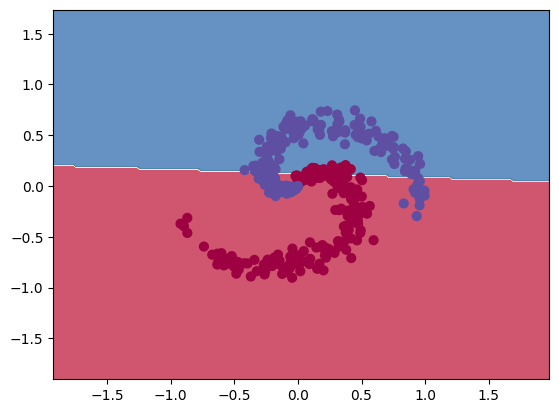

In [53]:
visualize(sample, target, LogisticRegression)

## visualization:

x2 = -(0.26430854201316833*x1 + tensor([-0.1892])) / 0.8816277384757996


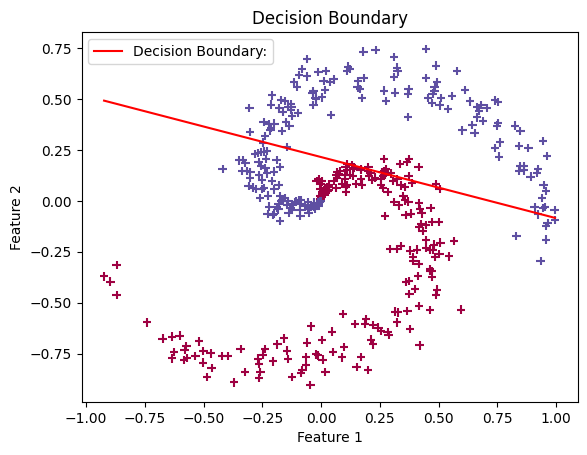

In [55]:
coefficients = LogisticRegression_loaded.linear.weight.data
intercept = LogisticRegression_loaded.linear.bias.data
import matplotlib.pyplot as plt
X = sample
y = target
y_pred = output
# plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral,  marker='+') #coolwarm
# Plot the decision boundary
x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x2 = -(coefficients[0][0]*x1 + intercept) / coefficients[0][1]
equation = f"x2 = -({coefficients[0][0]}*x1 + {intercept}) / {coefficients[0][1]}"

plt.plot(x1, x2, 'r-', label='Decision Boundary:')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
print(equation)
plt.show()


### Deep Linear Neural Network

In [59]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


X = sample
y = target

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


class LinearNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(LinearNN, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_sizes[0], bias = True))
        
        # Add hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i], bias = True))
        
        self.layers.append(nn.Linear(hidden_sizes[-1], num_classes, bias = True))
        self.sigmoid = nn.Sigmoid() 

    
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            x = self.sigmoid(x)
        return x


input_size = 2
hidden_sizes = [ 32,8, 4] 
num_classes = 2
LinearNN_model = LinearNN(input_size, hidden_sizes, num_classes)
print(LinearNN_model)

loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.SGD(LinearNN_model.parameters(), lr=0.01)

n_epochs = 500000


for epoch in range(n_epochs):
    y_pred = LinearNN_model(X)
    acc = (y_pred.round() == y).float().mean()
    loss = loss_fn(y_pred[:, 0].unsqueeze(1) , y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch%10000==0):
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}')


y_pred = LinearNN_model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")


predictions = (LinearNN_model(X) > 0.5).int()


LinearNN(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): Linear(in_features=4, out_features=2, bias=True)
  )
  (sigmoid): Sigmoid()
)
Epoch [1/500000], Loss: 0.6932, Accuracy: 0.5
Epoch [10001/500000], Loss: 0.6927, Accuracy: 0.6462500095367432
Epoch [20001/500000], Loss: 0.6918, Accuracy: 0.6349999904632568
Epoch [30001/500000], Loss: 0.6887, Accuracy: 0.6112499833106995
Epoch [40001/500000], Loss: 0.6624, Accuracy: 0.5987499952316284
Epoch [50001/500000], Loss: 0.4349, Accuracy: 0.59375
Epoch [60001/500000], Loss: 0.4174, Accuracy: 0.5962499976158142
Epoch [70001/500000], Loss: 0.4114, Accuracy: 0.6000000238418579
Epoch [80001/500000], Loss: 0.4049, Accuracy: 0.6012499928474426
Epoch [90001/500000], Loss: 0.3925, Accuracy: 0.6012499928474426
Epoch [100001/500000], Loss: 0.3618, Accuracy: 0.6287500262260437
Epoch [110001/500

In [60]:
print(loss.item())

0.007498025428503752


In [63]:

#torch.save(LinearNN_model, 'linearNN74.pth')
LinearNN_loaded = torch.load('linearNN74.pth')
LinearNN_loaded.eval()
y_pred = LinearNN_loaded(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")
print(f"loss {loss.item()}")

Accuracy 0.7487499713897705
loss 0.007498025428503752


In [104]:
# for i in range(4):
#     layer = LinearNN_loaded.layers[i]
#     if hasattr(layer, 'weight'):
#         print(f"self.layers[{i}].weight.data = {layer.weight.data}")
        

## Visualization: 

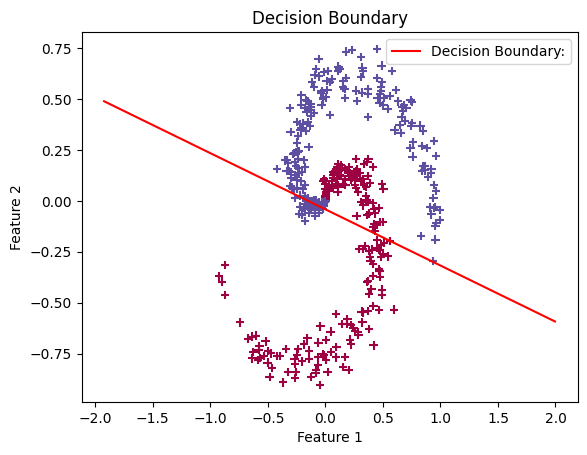

y = -(3.1050491333007812 * x + tensor([ 1.1808, -0.3879])) / 9.809708595275879
y = tensor([ 0.4884, -0.5921], dtype=torch.float64)


In [67]:

X = sample
y = target

# plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
x1_min, x1_max = sample[:, 0].min() - 1, sample[:, 0].max() + 1
x2_min, x2_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral,  marker='+') #coolwarm

w = LinearNN_loaded.layers[-1].weight.data
b = LinearNN_loaded.layers[-1].bias.data
x_plot = np.array([x1_min, x1_max])
#x_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_plot = -(w[0,0] * x_plot + b) / w[0,1]
#plt.plot(x_plot, y_plot, 'k-')
plt.plot(x_plot, y_plot, 'r-', label='Decision Boundary:')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
# print(equation)
plt.show()
print(f"y = -({w[0, 0]} * x + {b}) / {w[0, 1]}")
print(f"y = {y_plot}")

### Deep Neural Network

In [110]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

X = sample
y = target

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

class NonlinearNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(NonlinearNN, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_sizes[0], bias=True))
        
        
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i], bias=True))
            self.layers.append(nn.ReLU())
        
        self.layers.append(nn.Linear(hidden_sizes[-1], num_classes, bias=True))
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.sigmoid(x)
        return x

input_size = 2
hidden_sizes = [8,23,30,62, 16,8, 4]  
num_classes = 2
NonlinearNN_model = NonlinearNN(input_size, hidden_sizes, num_classes)
print(NonlinearNN_model)


loss_fn = nn.BCELoss() # binary cross-entropy loss_fn = nn.BCELoss() nn.MSELoss()
optimizer = optim.SGD(NonlinearNN_model.parameters(), lr=0.01)

#n_epochs = 1000000
total_samples = y.size(0)
n_misclassifications = 0
acc =0 
epoch=0
while(acc<0.999):
#for epoch in range(n_epochs):
    y_pred = NonlinearNN_model(X)
    acc = (y_pred.round() == y).float().mean()
    loss = loss_fn(y_pred[:, 0].unsqueeze(1), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch % 10000 == 0):
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}')
    epoch = epoch +1

y_pred = NonlinearNN_model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy: {accuracy}")


predictions = (NonlinearNN_model(X) > 0.5).int()


NonlinearNN(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=23, bias=True)
    (2): ReLU()
    (3): Linear(in_features=23, out_features=30, bias=True)
    (4): ReLU()
    (5): Linear(in_features=30, out_features=62, bias=True)
    (6): ReLU()
    (7): Linear(in_features=62, out_features=16, bias=True)
    (8): ReLU()
    (9): Linear(in_features=16, out_features=8, bias=True)
    (10): ReLU()
    (11): Linear(in_features=8, out_features=4, bias=True)
    (12): ReLU()
    (13): Linear(in_features=4, out_features=2, bias=True)
  )
  (sigmoid): Sigmoid()
)
Epoch [1/500000], Loss: 0.7191, Accuracy: 0.5
Epoch [10001/500000], Loss: 0.6479, Accuracy: 0.5950000286102295
Epoch [20001/500000], Loss: 0.0090, Accuracy: 0.9900000095367432
Epoch [30001/500000], Loss: 0.0071, Accuracy: 0.9950000047683716
Epoch [40001/500000], Loss: 0.0062, Accuracy: 0.9950000047683716
Epoch [50001/500000], Loss: 0.0057, Accuracy: 0.99500000

KeyboardInterrupt: 

# I reached 99.5 percent accuracy!

In [115]:

#torch.save(NonlinearNN_model, 'NonlinearNN_model99.5.pth')
NonLinearNN_loaded = torch.load('NonlinearNN_model99.5.pth')
NonLinearNN_loaded.eval()
y_pred = NonLinearNN_loaded(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")
print(f"loss {loss.item()}")

Accuracy 0.9950000047683716
loss 0.003655920037999749


In [116]:
for i in range(len(hidden_sizes)+7):
    layer = NonLinearNN_loaded.layers[i]
    if hasattr(layer, 'weight'):
        print(f"self.layers[{i}].weight.data = {layer.weight.data}")
        

self.layers[0].weight.data = tensor([[ 0.5564,  1.0073],
        [ 1.4956,  1.8406],
        [-0.7261, -0.5969],
        [ 0.6665,  1.6432],
        [-0.9924,  0.4938],
        [ 0.2678, -0.0455],
        [ 1.3064,  0.7571],
        [ 0.8253,  0.5619]])
self.layers[1].weight.data = tensor([[ 2.2025e-01, -1.4237e-01, -1.3649e-01, -8.6062e-02,  3.7924e-01,
         -2.3687e-01,  6.2361e-02, -2.3242e-01],
        [-2.5173e-02,  1.5443e-01,  2.1476e-01,  8.3543e-03, -1.0531e-01,
         -2.1696e-02,  2.2592e-02,  1.2369e-01],
        [ 2.0749e-01,  3.9302e-01,  4.6487e-03, -2.7780e-01, -3.3725e-01,
          1.9725e-01,  6.0690e-01,  4.4710e-01],
        [-1.9766e-01, -2.3589e-01, -1.4664e-01,  2.9553e-01, -3.4445e-01,
          2.8917e-01, -2.0350e-01, -2.5782e-01],
        [-3.9425e-01, -3.4172e-01,  3.8191e-01, -1.6667e-01, -4.9383e-02,
          1.2919e-01, -2.9402e-01, -4.4066e-01],
        [-3.3132e-01,  5.3761e-02, -3.3386e-01, -1.3102e-02,  5.3558e-02,
         -3.0067e-01, -3.075

### Deep Neural Network with L2-regularization

$\lambda = 0.01, 2, 100$


In [134]:
#   Coefficient of L2-regularization = 0.01:


NonLinearNN_loaded = torch.load('NonlinearNN_model99.5.pth')
optimizer = optim.SGD(NonLinearNN_loaded.parameters(), lr=0.01, weight_decay=0.01)
n_epochs = 150000
#while(acc<0.999):
for epoch in range(n_epochs):
    y_pred = NonLinearNN_loaded(X)
    acc = (y_pred.round() == y).float().mean()
    loss = loss_fn(y_pred[:, 0].unsqueeze(1), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch % 10000 == 0):
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}')
    epoch = epoch +1

y_pred = NonLinearNN_loaded(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")
print(f"loss {loss.item()}")

Epoch [1/150000], Loss: 0.0037, Accuracy: 0.9950000047683716
Epoch [10001/150000], Loss: 0.0277, Accuracy: 0.918749988079071
Epoch [20001/150000], Loss: 0.0278, Accuracy: 0.8949999809265137
Epoch [30001/150000], Loss: 0.0277, Accuracy: 0.8887500166893005
Epoch [40001/150000], Loss: 0.0276, Accuracy: 0.8837500214576721
Epoch [50001/150000], Loss: 0.0275, Accuracy: 0.8774999976158142
Epoch [60001/150000], Loss: 0.0275, Accuracy: 0.875
Epoch [70001/150000], Loss: 0.0275, Accuracy: 0.875
Epoch [80001/150000], Loss: 0.0275, Accuracy: 0.8737499713897705
Epoch [90001/150000], Loss: 0.0275, Accuracy: 0.8712499737739563
Epoch [100001/150000], Loss: 0.0274, Accuracy: 0.8725000023841858
Epoch [110001/150000], Loss: 0.0274, Accuracy: 0.8762500286102295
Epoch [120001/150000], Loss: 0.0274, Accuracy: 0.8887500166893005
Epoch [130001/150000], Loss: 0.0274, Accuracy: 0.9087499976158142
Epoch [140001/150000], Loss: 0.0274, Accuracy: 0.9649999737739563
Accuracy 0.9912499785423279
loss 0.0273851845413446

In [135]:
#   Coefficient of L2-regularization = 2:


NonLinearNN_loaded = torch.load('NonlinearNN_model99.5.pth')
optimizer = optim.SGD(NonLinearNN_loaded.parameters(), lr=0.01, weight_decay=2)
n_epochs = 150000
#while(acc<0.999):
for epoch in range(n_epochs):
    y_pred = NonLinearNN_loaded(X)
    acc = (y_pred.round() == y).float().mean()
    loss = loss_fn(y_pred[:, 0].unsqueeze(1), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch % 10000 == 0):
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}')
    epoch = epoch +1

y_pred = NonLinearNN_loaded(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")
print(f"loss {loss.item()}")

Epoch [1/150000], Loss: 0.0037, Accuracy: 0.9950000047683716
Epoch [10001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [20001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [30001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [40001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [50001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [60001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [70001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [80001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [90001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [100001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [110001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [120001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [130001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [140001/150000], Loss: 0.6931, Accuracy: 0.5
Accuracy 0.5
loss 0.6931471824645996


In [136]:
#   Coefficient of L2-regularization = 100:


NonLinearNN_loaded = torch.load('NonlinearNN_model99.5.pth')
optimizer = optim.SGD(NonLinearNN_loaded.parameters(), lr=0.01, weight_decay=100)
n_epochs = 150000
#while(acc<0.999):
for epoch in range(n_epochs):
    y_pred = NonLinearNN_loaded(X)
    acc = (y_pred.round() == y).float().mean()
    loss = loss_fn(y_pred[:, 0].unsqueeze(1), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch % 10000 == 0):
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}')
    epoch = epoch +1

y_pred = NonLinearNN_loaded(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")
print(f"loss {loss.item()}")

Epoch [1/150000], Loss: 0.0037, Accuracy: 0.9950000047683716
Epoch [10001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [20001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [30001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [40001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [50001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [60001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [70001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [80001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [90001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [100001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [110001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [120001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [130001/150000], Loss: 0.6931, Accuracy: 0.5
Epoch [140001/150000], Loss: 0.6931, Accuracy: 0.5
Accuracy 0.5
loss 0.6931471824645996


### All the models start at the exact same place. Seems like lambda = 0.01 does a fantastic job! Others fall down and get stuck at the 50% accuracy. 
